In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

print(pm.__version__)

5.5.0


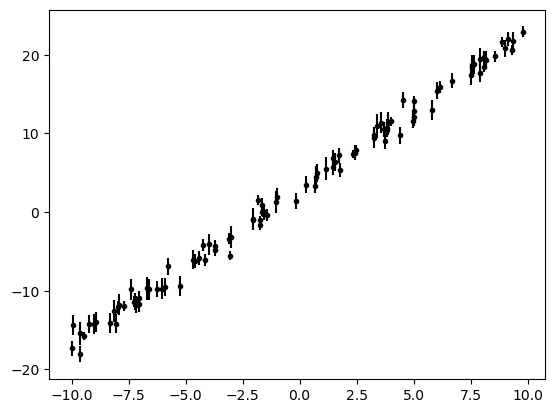

In [2]:
np.random.seed(1)
x = np.random.uniform(-10,10,100)
y = (x*2 + 3)+np.random.normal(0,1,100)
dy = np.random.uniform(0.5,1.5,100)
plt.errorbar(x,y,dy,fmt='.k');

In [3]:
def line_model(x, y, dy):
    with pm.Model() as model:
        data_x = pm.ConstantData(name='data x',value=x)
        data_y = pm.ConstantData(name='data y',value=y)
        data_dy = pm.ConstantData(name='data dy',value=dy)
        m = pm.Uniform('m',-2,4)
        d = pm.Uniform('d',-10,10)
        resp_y = pm.Normal('Y', mu=m*data_x+d, sigma=data_dy, observed=data_y)
    return model


applied_model = line_model(x,y,dy)

In [4]:
with applied_model:
    ## Prior
    prior = pm.sample_prior_predictive(1000,var_names=['m','d','Y'])
    applied_model_idata = prior
    ## NUTS
    hmc = pm.sample(tune=500,draws=1000, cores=4, chains=4)
    applied_model_idata.extend(hmc)
    ## Posterior
    post = pm.sample_posterior_predictive(applied_model_idata,var_names=['m','d','Y'])
    applied_model_idata.extend(post)


applied_model_idata

Sampling: [Y, d, m]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [m, d]


Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 1 seconds.
Sampling: [Y, d, m]


Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

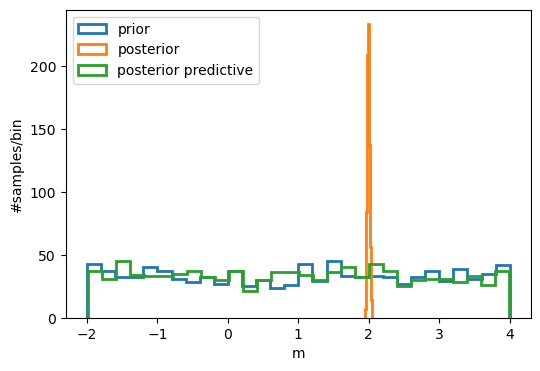

In [5]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(1,1,1)
ax.hist(applied_model_idata.prior['m'][0],label='prior',histtype='step',lw=2,bins=30);
ax.hist(applied_model_idata.posterior['m'][0],label='posterior',histtype='step',lw=2);
ax.hist(applied_model_idata.posterior_predictive['m'][0],label='posterior predictive',histtype='step',lw=2,bins=30);
ax.set_xlabel('m')
ax.set_ylabel('#samples/bin')
ax.legend()